In [34]:
import pandas as pd
from prophet import Prophet

In [35]:
data = pd.read_csv('peyton_manning.csv')
data.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [47]:
#m = Prophet() #Instantiate a prophet object and fit the data
m = Prophet(changepoint_range=0.9) #include 90% of the points for change points
m = Prophet(changepoint_prior_scale=0.5) #address the trend flexibility

In [48]:
m.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
future_steps = m.make_future_dataframe(periods = 365)

In [50]:
future_steps.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [51]:
#Let's predict the future steps results
forecast = m.predict(future_steps)

In [52]:
data.shape

(2905, 2)

In [53]:
future_steps.shape

(3270, 1)

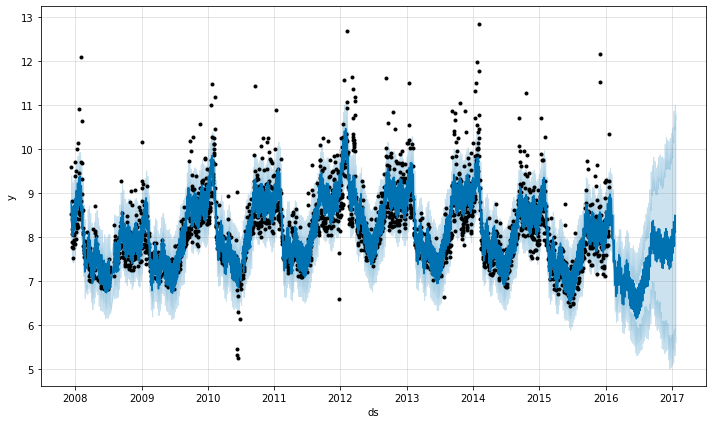

In [54]:
fig1 = m.plot(forecast)

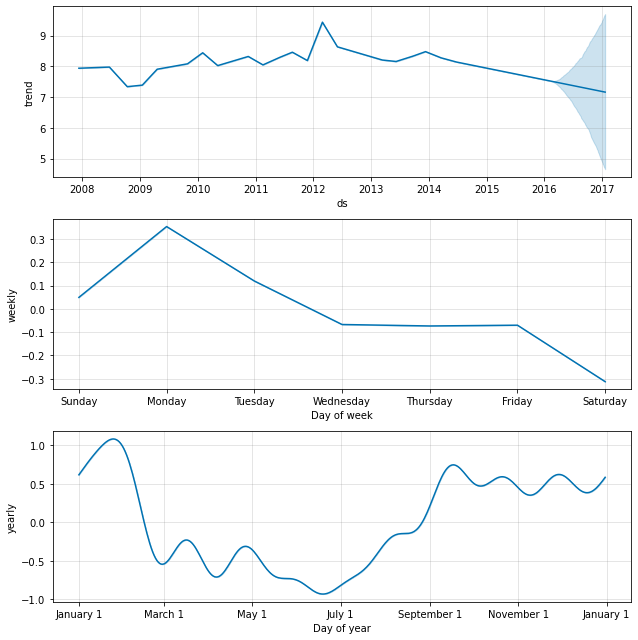

In [55]:
fig2 =m.plot_components(forecast)

In [56]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3265,2017-01-15,7.165995,5.679526,10.759508,4.692892,9.674065,1.007337,1.007337,1.007337,0.049389,0.049389,0.049389,0.957948,0.957948,0.957948,0.0,0.0,0.0,8.173332
3266,2017-01-16,7.164953,5.945650,11.005975,4.681131,9.678382,1.331532,1.331532,1.331532,0.353399,0.353399,0.353399,0.978134,0.978134,0.978134,0.0,0.0,0.0,8.496486
3267,2017-01-17,7.163911,5.670808,10.839103,4.670812,9.682700,1.117089,1.117089,1.117089,0.119746,0.119746,0.119746,0.997343,0.997343,0.997343,0.0,0.0,0.0,8.281000
3268,2017-01-18,7.162869,5.727912,10.654497,4.660801,9.688658,0.948357,0.948357,0.948357,-0.067021,-0.067021,-0.067021,1.015378,1.015378,1.015378,0.0,0.0,0.0,8.111226
3269,2017-01-19,7.161827,5.600749,10.788849,4.650150,9.700880,0.958722,0.958722,0.958722,-0.073280,-0.073280,-0.073280,1.032001,1.032001,1.032001,0.0,0.0,0.0,8.120548


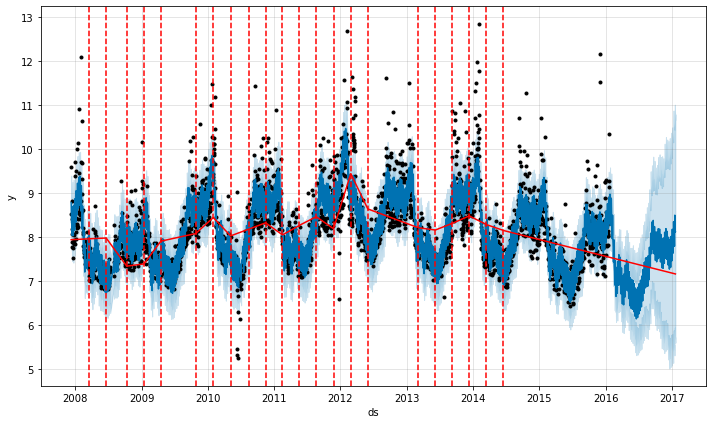

In [57]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)